## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Drop duplicate timepoints
# study_results = study_results.drop_duplicates("Timepoint")

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].count()
number_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice = merged_data.drop_duplicates(["Mouse ID","Timepoint"])
unique_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = unique_mice["Mouse ID"].count()
number_of_mice

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
mean_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# This method is the most straightforward, creating multiple series and putting them all together at the end.
regimen_statistics = pd.DataFrame({"Mean" : mean_tumor,
                                "Median" : median_tumor,
                                "Variance" : variance_tumor,
                                "Stxandard Deviation" : stdev_tumor,
                                 "SEM" : sem_tumor})

regimen_statistics

,Mean,Median,Variance,Stxandard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
simple_summary = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# This method produces everything in a single groupby function
simple_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

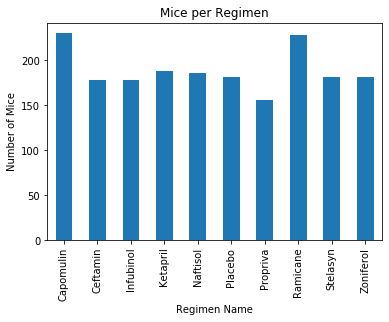

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_regimen = unique_mice.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_per_regimen.plot(kind='bar', x="Drug Regimen", y=mice_per_regimen)
plt.xlabel("Regimen Name")
plt.ylabel("Number of Mice")
plt.title("Mice per Regimen")
mice_per_regimen

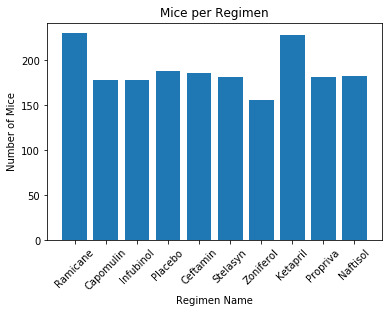

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = unique_mice.groupby(["Drug Regimen"])["Mouse ID"].count()
x_axis = unique_mice["Drug Regimen"].unique()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.xlabel("Regimen Name")
plt.ylabel("Number of Mice")
plt.title("Mice per Regimen")
plt.show()

Sex
Female    930
Male      958
Name: Sex, dtype: int64

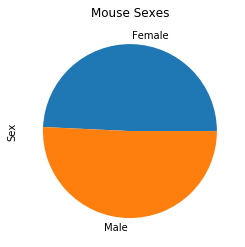

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sexes = unique_mice.groupby(["Sex"])["Sex"].count()
mouse_sexes.plot(kind='pie')
plt.title("Mouse Sexes")
mouse_sexes

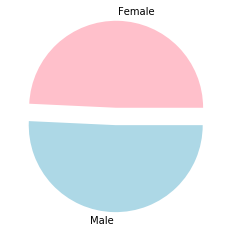

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sexes, labels=["Female","Male"], explode=[.1,.1], colors=['pink','lightblue'])
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = unique_mice.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_by_timepoint = pd.merge(last_timepoint, unique_mice, on="Timepoint", how='left')
merged_by_timepoint

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
40251,45,y769,Ceftamin,Female,6,27,68.594745,4
40252,45,y865,Ceftamin,Male,23,26,64.729837,3
40253,45,z581,Infubinol,Female,24,25,62.754451,3
40254,45,z795,Naftisol,Female,13,29,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [merged_by_timepoint["Drug Regimen"].unique()]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_by_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol.append(merged_by_timepoint["Tumor Volume (mm3)"])
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    

[0        22.050126
 1        23.343598
 2        28.484033
 3        28.430964
 4        29.128472
            ...    
 40251    68.594745
 40252    64.729837
 40253    62.754451
 40254    65.741070
 40255    73.867845
 Name: Tumor Volume (mm3), Length: 40256, dtype: float64]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed67d8cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed67d90c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed67d82748>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed67d93b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed67d97d48>],
 'means': []}

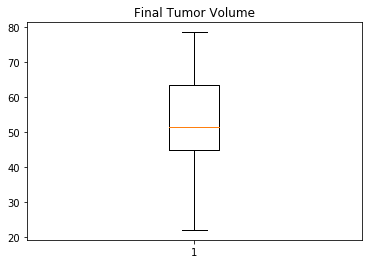

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# spread = np.random.rand(50) * 100
# center = np.ones(25) * 50
# flier_high = np.random.rand(10) * 100 + 100
# flier_low = np.random.rand(10) * -100
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.boxplot(tumor_vol)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_scatter = (unique_mice["Mouse ID"]="sk403")
tumor_vol_scatter = (unique_mice["Tumor Volu])
plt.scatter(x_axis, mouse_scatter, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
